In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
from sympy import sequence
from sympy.abc import n
from sympy import oo, exp, dsolve
from sympy import Function, Derivative
from sympy.abc import  t
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
s = sequence(1/n**2, (n, 1, oo))

In [ ]:
s[0:5]

In [ ]:
s.stop

In [ ]:
x = Function("x")
dxdt = Derivative(x(t), t)
eq = dxdt + x(t) - exp(-2*t)
eq

In [ ]:
dsolve(eq, x(t), ics = {x(0):0})

In [ ]:
# The ODE function that computes dx/dt from x and t
def dxdt(t, x):
    return -x + np.exp(-2*t)
# Solve the differential equation using solve_ivp
t_eval = np.linspace(0, 10, 100)
solution = solve_ivp(dxdt, (0, 10), [0], t_eval=t_eval)
analytical_sol = np.exp(-t_eval)*(1-np.exp(-t_eval))
# plot
plt.figure()
plt.plot(solution.t, solution.y[0], 'b-', linewidth=2, label = 'numerical')
plt.plot(t_eval, analytical_sol, 'r*', linewidth=2, label = 'analytical')
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.title(r'Solution of $\dot{x} = -x + e^{-2t}$')
plt.legend()
plt.show()

In [ ]:
A = np.array([[1,2],[0,4]])
B = np.array([[1,1],[1,2]])
A
B

In [ ]:
A@B

In [ ]:
B@A

In [ ]:
A.T

In [10]:
def dydt(t, y):
    return [y[3], y[2], -y[0], -y[1]*y[0]+t]
sol = solve_ivp(dydt, [0, 2], [0, 0,0,0], t_eval=np.linspace(0, 2, 50))



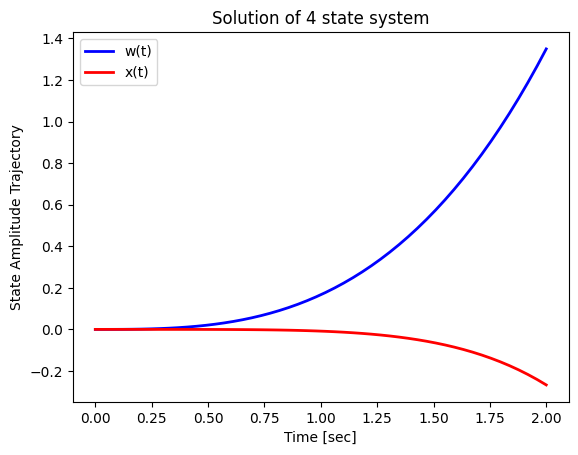

In [12]:
plt.figure()
plt.plot(sol.t, sol.y[0], 'b-', linewidth=2, label = 'w(t)')
plt.plot(sol.t, sol.y[1], 'r-', linewidth=2, label = 'x(t)')
plt.xlabel('Time [sec]')
plt.ylabel('State Amplitude Trajectory')
plt.title(r'Solution of 4 state system')
plt.legend()
plt.show()

In [23]:
solutionFE01.shape

(201, 1)

In [25]:
t01.shape

(201,)

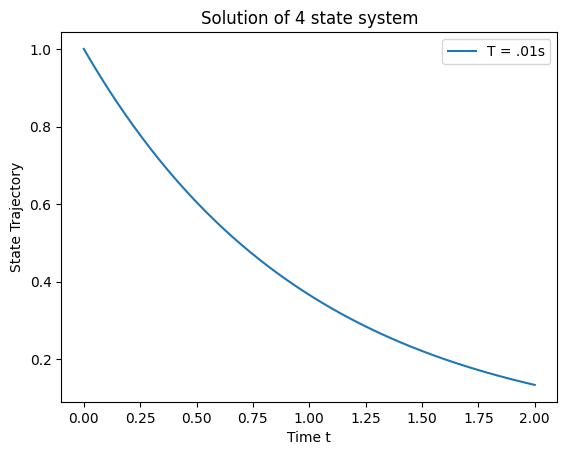

In [30]:
t01, solutionFE01 = euler_solver(dxdt, t_span, [1.0], .01)
t1, solutionFE1 = euler_solver(dxdt, t_span, [1.0], .1)
fig, ax = plt.subplots()
#ax.plot(sol.t, sol.y[0], 'b-', linewidth=2, label = 'w(t)')
#ax.plot(sol.t, sol.y[1], 'r-', linewidth=2, label = 'x(t)')
ax.plot(t01, solutionFE01[:,0], label='T = .01s')
ax.set_xlabel('Time t')
ax.set_ylabel('State Trajectory')
ax.set_title(r'Solution of 4 state system')
ax.legend()
#ax.set_ylim(-.3, 0)
#plt.show()

In [13]:
def euler_solver(func, tspan, x0, T): 
    t=  np.arange(tspan[0], tspan[1] + T, T) 
    x = np.zeros((len(t), len(x0))) 
    x[0, :] = x0 
    # Perform the Forward Euler iterations 
    for k in range(len(t) - 1): 
        dx = func(t[k], x[k, :]) 
        x[k + 1, :] = x[k, :] + T * np.array(dx) 
    return t, x 
# The ODE function that computers dx/dt from x and t 
def dxdt(t, x): 
    return [-x[0]]  


In [ ]:
solutionFE.transpose().shape
type(solutionFE)

In [ ]:
t, solutionFE = euler_solver(dxdt, t_span, [1.0], .005)
solutionFE[-1,0]

In [14]:
#define a vector of “stepsizes" ranging from 0.001 to 0.1 in increments of 0.001. 
steps = np.arange(.001,.1,.001)
t_span = (0,2)
errors = np.zeros(len(steps))
y_fs = np.zeros(len(steps))
y_f_acts = np.zeros(len(steps))
for step, i in zip(steps, range(len(steps))):
    t, solutionFE = euler_solver(dxdt, t_span, [1.0], step) 
    y_fs[i] = solutionFE[-1,0]
    y_f_acts[i] =  np.exp(-t[-1])
    errors[i] = y_f_acts[i] - y_fs[i]
    



In [ ]:
#y_fs
#y_f_act
#solutionFE
t


Compute the “approximation error”
of the solver by subtracting the last element of the output vector from its ground truth. Make sure you
evaluate the ground truth at the correct value of t (hint: not necessarily 2 seconds).

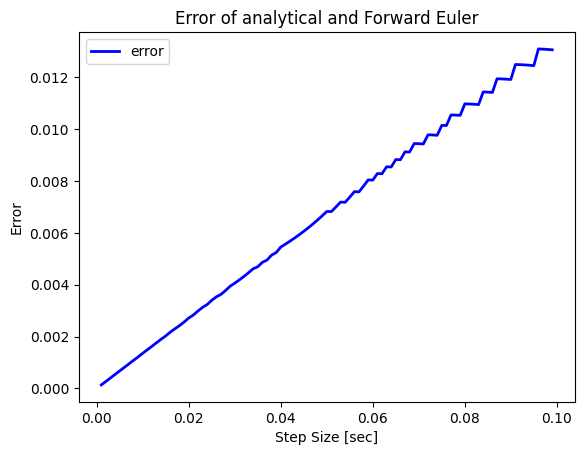

In [16]:
fig, ax = plt.subplots()
ax.plot(steps, errors, 'b-', linewidth=2, label = 'error')
#ax.plot(sol.t, sol.y[1], 'r-', linewidth=2, label = 'x(t)')
ax.set_xlabel('Step Size [sec]')
ax.set_ylabel('Error')
#ax.set_title(r'$\text{Error of} \,\y = e^{-t}\text{and Forward Euler}$')
ax.set_title(r'Error of analytical and Forward Euler')
ax.legend()


In [ ]:
fig, ax = plt.subplots()
ax.plot(steps, errors, 'b-', linewidth=2, label = 'error')
#ax.plot(sol.t, sol.y[1], 'r-', linewidth=2, label = 'x(t)')
ax.set_xlabel('Time')
ax.set_ylabel('Error')
ax.set_title(r'Solution of $\,\frac{dy}{dt}=-y$')
ax.legend()